In [2]:
import time
import numpy as np
import pandas as pd
import datetime as dt
from pylab import plt, mpl

In [3]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'


In [4]:
from fxcmpy import fxcmpy_tick_data_reader as tdr

In [5]:
print(tdr.get_available_symbols())

('AUDCAD', 'AUDCHF', 'AUDJPY', 'AUDNZD', 'CADCHF', 'EURAUD', 'EURCHF', 'EURGBP', 'EURJPY', 'EURUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'GBPUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'NZDCAD', 'NZDCHF', 'NZDJPY', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDJPY')


In [6]:
start=dt.datetime(2019,6,25)
stop=dt.datetime(2019,6,30)

In [7]:
td=tdr('EURUSD',start,stop)          

In [8]:
td.get_raw_data().info()

<class 'pandas.core.frame.DataFrame'>
Index: 1071149 entries, 06/23/2019 21:00:02.980 to 06/28/2019 20:59:00.201
Data columns (total 2 columns):
Bid    1071149 non-null float64
Ask    1071149 non-null float64
dtypes: float64(2)
memory usage: 20.4+ MB


In [9]:
td.get_data().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1071149 entries, 2019-06-23 21:00:02.980000 to 2019-06-28 20:59:00.201000
Data columns (total 2 columns):
Bid    1071149 non-null float64
Ask    1071149 non-null float64
dtypes: float64(2)
memory usage: 24.5 MB


In [10]:
td.get_data().head()

,Bid,Ask
2019-06-23 21:00:02.980,1.137,1.13740
2019-06-23 21:00:07.627,1.137,1.13735
2019-06-23 21:01:11.638,1.137,1.13733
2019-06-23 21:01:11.735,1.137,1.13730
2019-06-23 21:01:26.155,1.137,1.13735


In [25]:
sub=td.get_data(start='2019-04-28 12:00:00',end='2019-12-29 12:15:00')
sub.head()

,Bid,Ask
2019-06-23 21:00:02.980,1.137,1.13740
2019-06-23 21:00:07.627,1.137,1.13735
2019-06-23 21:01:11.638,1.137,1.13733
2019-06-23 21:01:11.735,1.137,1.13730
2019-06-23 21:01:26.155,1.137,1.13735


In [12]:
sub['Mid']=sub.mean(axis=1)
print(sub['Mid'])

Series([], Name: Mid, dtype: float64)


In [13]:
sub['SMA']=sub['Mid'].rolling(1000).mean()
print(sub['SMA'])

Series([], Name: SMA, dtype: float64)


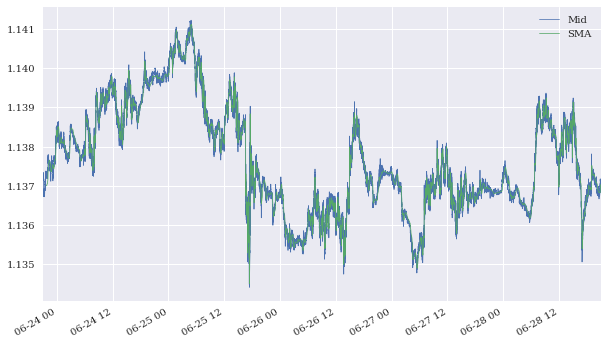

In [43]:
sub[['Mid','SMA']].plot(figsize=(10,6),lw=0.75)